In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [46]:
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [47]:
Ocy3_S002=pd.read_excel(r'C:\ZL\Google drive syn\Research\manuscript writing\Harvesting efficiency\Harvesting report\Harvesting paper\Data\Python regression analysis\data combine\Ocy03+S002_clean_reggression.xlsx')

In [48]:
Ocy3_S002.columns.values

array(['Ocy03', 'S002', 'Days', 'PAR', 'insituoC', 'pH(harvest)',
       'Turbidity_GrowthRate(1/d)', 'PercentAsh_Cells(Final)',
       'Turbidity_initial(NTU)', 'DW_final(g/L)',
       ' Harvesting Efficiency'], dtype=object)

In [49]:
target=np.where(Ocy3_S002[' Harvesting Efficiency'] > 60, 1, 0)

In [50]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [51]:
unscaled_input=Ocy3_S002.iloc[:,:-1]

In [52]:
display(unscaled_input)

,Ocy03,S002,Days,PAR,insituoC,pH(harvest),Turbidity_GrowthRate(1/d),PercentAsh_Cells(Final),Turbidity_initial(NTU),DW_final(g/L)
0,1,0,4,53.109300,21.520000,6.29,0.517853,0.331111,14.5500,0.290687
1,1,0,4,38.060250,22.800000,6.47,0.720127,0.146693,15.6000,0.259100
2,1,0,3,52.337625,24.150000,6.53,0.747580,0.303223,12.6000,0.291167
3,1,0,3,50.590725,25.350000,6.83,0.878024,0.107224,18.8500,0.179350
4,1,0,3,52.181400,26.850000,8.80,0.724963,0.237153,44.9000,0.443400
5,1,0,3,57.034275,28.200000,9.25,0.647032,0.415916,15.3500,0.376812
6,1,0,3,57.109125,29.675000,9.63,0.878211,0.309800,15.6500,0.404400
7,1,0,2,55.241750,27.166667,8.77,0.581839,0.246268,24.3000,0.252500
8,1,0,3,38.336363,26.175000,9.36,0.975042,0.062525,28.2500,0.182300
9,1,0,3,29.815350,24.800000,9.46,1.326696,0.081171,22.6000,0.166900


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [55]:
columns_to_omit =['Ocy03','S002']
columns_to_scale = [x for x in unscaled_input.columns.values if x not in columns_to_omit]
columns_to_scale

['Days',
 'PAR',
 'insituoC',
 'pH(harvest)',
 'Turbidity_GrowthRate(1/d)',
 'PercentAsh_Cells(Final)',
 'Turbidity_initial(NTU)',
 'DW_final(g/L)']

In [56]:
flocculation_scaler = CustomScaler(columns_to_scale)

In [57]:
flocculation_scaler.fit(unscaled_input)

CustomScaler(columns=['Days', 'PAR', 'insituoC', 'pH(harvest)', 'Turbidity_GrowthRate(1/d)', 'PercentAsh_Cells(Final)', 'Turbidity_initial(NTU)', 'DW_final(g/L)'],
       copy=None, with_mean=None, with_std=None)

In [58]:
scaled_inputs = flocculation_scaler.transform(unscaled_input)

In [59]:
scaled_inputs 

,Ocy03,S002,Days,PAR,insituoC,pH(harvest),Turbidity_GrowthRate(1/d),PercentAsh_Cells(Final),Turbidity_initial(NTU),DW_final(g/L)
0,1,0,2.062572,0.461011,-2.589822,-3.060399,-0.441651,-0.598413,0.146963,0.093010
1,1,0,2.062572,-1.567068,-2.189825,-2.858614,0.215256,-1.065131,0.197512,-0.182180
2,1,0,0.183340,0.357016,-1.767952,-2.791353,0.304413,-0.668991,0.053087,0.097192
3,1,0,0.183340,0.121596,-1.392954,-2.455045,0.728045,-1.165018,0.353972,-0.876971
4,1,0,0.183340,0.335963,-0.924207,-0.246626,0.230962,-0.836199,1.608058,1.423465
5,1,0,0.183340,0.989958,-0.502334,0.257836,-0.022128,-0.383792,0.185476,0.843342
6,1,0,0.183340,1.000045,-0.041400,0.683825,0.728652,-0.652346,0.199919,1.083692
7,1,0,-1.695892,0.748389,-0.825249,-0.280256,-0.233849,-0.813131,0.616343,-0.239680
8,1,0,0.183340,-1.529857,-1.135143,0.381149,1.043122,-1.278141,0.806502,-0.851271
9,1,0,0.183340,-2.678188,-1.564828,0.493251,2.185157,-1.230952,0.534502,-0.985437


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [62]:
print (x_train.shape, y_train.shape)

(32, 10) (32,)


In [63]:
print (x_test.shape, y_test.shape)

(9, 10) (9,)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [65]:
reg = LogisticRegression()

In [66]:
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
reg.score(x_train,y_train)

0.9375

In [68]:
reg.score(x_test,y_test)

0.7777777777777778

In [69]:
feature_name = scaled_inputs.columns.values

In [70]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,Ocy03,0.698519
1,S002,0.589041
2,Days,0.653210
3,PAR,0.462782
4,insituoC,-0.020487
5,pH(harvest),-0.327768
6,Turbidity_GrowthRate(1/d),0.051766
7,PercentAsh_Cells(Final),-1.068282
8,Turbidity_initial(NTU),0.217901
9,DW_final(g/L),0.087743


In [71]:
summary_table=summary_table.sort_values('Coefficient', ascending=True)

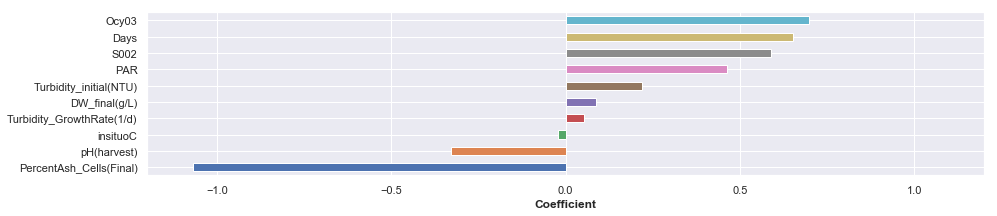

In [77]:
ax=summary_table.plot.barh(x='Feature name', y='Coefficient',figsize=(15,3))
ax.get_legend().remove()
ax.set_ylabel('')
plt.xlim(-1.2,1.2)
ax.set_xlabel('Coefficient',fontweight='bold')
plt.savefig(r'C:\ZL\Personal\Green Card\Dropbox\Harvesting paper\ML\Flocculation_based.png',dpi = 900)
plt.savefig(r'C:\ZL\Personal\Green Card\Dropbox\Harvesting paper\ML\Flocculation_based.jpg',dpi = 900)
plt.show()

In [27]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,1.287560
1,Ocy03,0.698519
2,S002,0.589041
3,Days,0.653210
4,PAR,0.462782
5,insituoC,-0.020487
6,pH(harvest),-0.327768
7,Turbidity_GrowthRate(1/d),0.051766
8,PercentAsh_Cells(Final),-1.068282
9,Turbidity_initial(NTU),0.217901


In [28]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,1.287560,3.623934
1,Ocy03,0.698519,2.010773
2,S002,0.589041,1.802259
3,Days,0.653210,1.921700
4,PAR,0.462782,1.588486
5,insituoC,-0.020487,0.979721
6,pH(harvest),-0.327768,0.720530
7,Turbidity_GrowthRate(1/d),0.051766,1.053130
8,PercentAsh_Cells(Final),-1.068282,0.343598
9,Turbidity_initial(NTU),0.217901,1.243464


In [31]:
summary_table=summary_table.sort_values('Odds_ratio', ascending=True)

In [ ]:
summary_table.reset_index(drop=True, inplace=True)

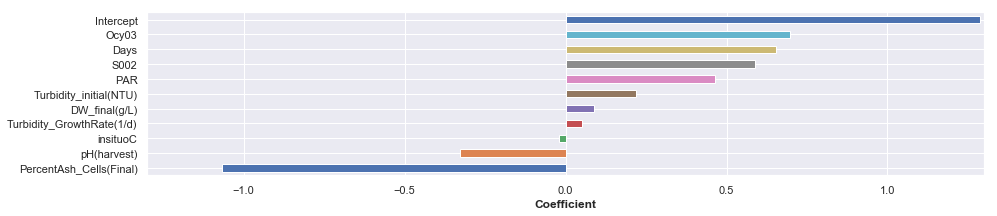

In [41]:
ax=summary_table.plot.barh(x='Feature name', y='Coefficient',figsize=(15,3))
ax.get_legend().remove()
ax.set_ylabel('')
plt.xlim(-1.3, 1.3)
ax.set_xlabel('Coefficient',fontweight='bold')
plt.savefig(r'C:\ZL\Personal\Green Card\Dropbox\Harvesting paper\ML\Flocculation_based.png',dpi = 900)
plt.savefig(r'C:\ZL\Personal\Green Card\Dropbox\Harvesting paper\ML\Flocculation_based.jpg',dpi = 900)
plt.show()

In [30]:
y=

SyntaxError: invalid syntax (<ipython-input-30-7bc08d73df12>, line 1)

In [ ]:
y=y_train
x1=x_train
x=sm.add_constant(x1)


In [ ]:
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

In [ ]:
results_log.summary()